# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/Users/justinjanice/anaconda3/envs/project/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
model = keras.Sequential()
layer = keras.applications.VGG16(weights="imagenet",include_top=False,input_shape = (224,224,3))
layer.trainable = False
model.add(layer)
model.add(keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.50))
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(4,activation = "softmax" ))
model.build(input_shape=(None,224, 224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 1024)        4719616   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 1024)        9438208   
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout (Dropout)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

#### [5 points] Train Model

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#raise NotImplementedError("Use the model.fit function to train your network")
history = model.fit(train_batches,validation_data=valid_batches, epochs=NUM_EPOCHS, batch_size = BATCH_SIZE, steps_per_epoch = STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)

22
6


/Users/justinjanice/anaconda3/envs/project/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/justinjanice/anaconda3/envs/project/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 23s 1s/step - loss: 1.4924 - accuracy: 0.3058 - val_loss: 1.4171 - val_accuracy: 0.3200
Epoch 2/100
21/21 [==============================] - 23s 1s/step - loss: 1.3695 - accuracy: 0.3641 - val_loss: 1.3060 - val_accuracy: 0.3600
Epoch 3/100
21/21 [==============================] - 23s 1s/step - loss: 1.1893 - accuracy: 0.4223 - val_loss: 1.0252 - val_accuracy: 0.4800
Epoch 4/100
21/21 [==============================] - 25s 1s/step - loss: 1.1377 - accuracy: 0.4762 - val_loss: 1.1068 - val_accuracy: 0.5200
Epoch 5/100
21/21 [==============================] - 24s 1s/step - loss: 1.1129 - accuracy: 0.5049 - val_loss: 0.9524 - val_accuracy: 0.5000
Epoch 6/100
21/21 [==============================] - 22s 1s/step - loss: 1.0380 - accuracy: 0.5048 - val_loss: 0.8910 - val_accuracy: 0.6400
Epoch 7/100
21/21 [==============================] - 23s 1s/step - loss: 0.9528 - accuracy: 0.6068 - val_loss: 0.9903 - val_accuracy: 0.5200
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 23s 1s/step - loss: 0.5204 - accuracy: 0.7573 - val_loss: 0.7821 - val_accuracy: 0.6600
Epoch 60/100
21/21 [==============================] - 23s 1s/step - loss: 0.6215 - accuracy: 0.7136 - val_loss: 0.6553 - val_accuracy: 0.6400
Epoch 61/100
21/21 [==============================] - 23s 1s/step - loss: 0.5816 - accuracy: 0.7233 - val_loss: 0.6001 - val_accuracy: 0.7000
Epoch 62/100
21/21 [==============================] - 23s 1s/step - loss: 0.5773 - accuracy: 0.7670 - val_loss: 0.7145 - val_accuracy: 0.6800
Epoch 63/100
21/21 [==============================] - 23s 1s/step - loss: 0.5806 - accuracy: 0.7136 - val_loss: 0.5571 - val_accuracy: 0.6800
Epoch 64/100
21/21 [==============================] - 23s 1s/step - loss: 0.5445 - accuracy: 0.7670 - val_loss: 0.4946 - val_accuracy: 0.7800
Epoch 65/100
21/21 [==============================] - 23s 1s/step - loss: 0.5090 - accuracy: 0.7718 - val_loss: 0.5447 - val_accuracy: 0.7400
Epoch 

#### [5 points] Plot Accuracy and Loss During Training

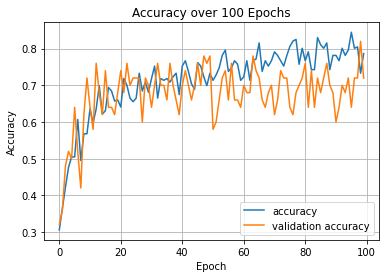

Text(0.5, 1.0, 'Loss over 100 Epochs')

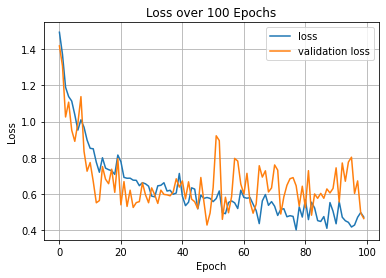

In [6]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy over 100 Epochs")
plt.show()
plt.grid()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Loss over 100 Epochs")

#### Testing Model

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
Instructions for updating:
Please use Model.evaluate, which supports generators.
36/36 [==============================] - 3s 80ms/step - loss: 0.8986 - accuracy: 0.6944
Test loss: 0.8985860347747803
Test accuracy: 0.6944444179534912


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
270/270 [==============================] - 22s 83ms/step
done


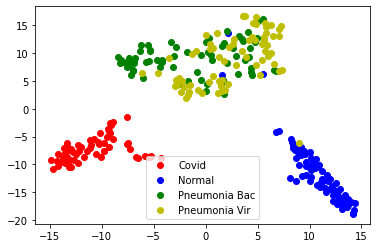

In [12]:
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
import seaborn as sns
import itertools

intermediate_layer_model = Model(inputs=model.input,
                                        outputs=model.get_layer('dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")




tsne_eval_generator.shuffle = False
tsne_eval_generator.num_classes = 4

intermediate_layer_model.compile(optimizer=opt,
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

prediction = intermediate_layer_model.predict(tsne_eval_generator, verbose = 1)


tsne = TSNE(n_components = 2).fit_transform(prediction)
colors = ["r","b","g","y"]
plt.scatter(tsne[:60,0], tsne[:60,1], c='r', label = "Covid" )
plt.scatter(tsne[60:130,0], tsne[60:130,1], c='b', label = "Normal" )
plt.scatter(tsne[130:200,0], tsne[130:200,1], c='g', label = "Pneumonia Bac" )
plt.scatter(tsne[200:270,0], tsne[200:270,1], c='y', label = "Pneumonia Vir" )
plt.legend()

print("done")

Start of Second Model. 

In [4]:
model2 = keras.Sequential()
layer = keras.applications.VGG16(weights="imagenet",include_top=False,input_shape = (224,224,3))
layer.trainable = False
model2.add(layer)
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation = "relu"))
model2.add(keras.layers.Dense(4,activation = "softmax" ))
model2.build(input_shape=(None,224, 224,3))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

In [5]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

model2.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#raise NotImplementedError("Use the model.fit function to train your network")
history2 = model2.fit(train_batches,validation_data=valid_batches, epochs=NUM_EPOCHS, batch_size = BATCH_SIZE, steps_per_epoch = STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)

22
6


/Users/justinjanice/anaconda3/envs/project/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/justinjanice/anaconda3/envs/project/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 18s 871ms/step - loss: 1.5883 - accuracy: 0.3301 - val_loss: 1.1752 - val_accuracy: 0.6200
Epoch 2/100
21/21 [==============================] - 18s 876ms/step - loss: 1.2151 - accuracy: 0.4854 - val_loss: 1.0901 - val_accuracy: 0.5000
Epoch 3/100
21/21 [==============================] - 18s 879ms/step - loss: 1.0976 - accuracy: 0.4612 - val_loss: 0.9664 - val_accuracy: 0.5800
Epoch 4/100
21/21 [==============================] - 18s 873ms/step - loss: 1.0388 - accuracy: 0.5243 - val_loss: 0.9256 - val_accuracy: 0.6000
Epoch 5/100
21/21 [==============================] - 19s 898ms/step - loss: 1.0094 - accuracy: 0.5583 - val_loss: 0.9328 - val_accuracy: 0.6000
Epoch 6/100
21/21 [==============================] - 19s 885ms/step - loss: 0.9509 - accuracy: 0.6068 - val_loss: 0.9446 - val_accuracy: 0.4600
Epoch 7/100
21/21 [==============================] - 20s 950ms/step - loss: 0.8564 - accuracy: 0.6165 - val_loss: 0.8588 - val_accuracy:

21/21 [==============================] - 20s 936ms/step - loss: 0.5571 - accuracy: 0.7670 - val_loss: 0.9315 - val_accuracy: 0.6400
Epoch 58/100
21/21 [==============================] - 20s 931ms/step - loss: 0.6869 - accuracy: 0.6990 - val_loss: 0.9618 - val_accuracy: 0.6000
Epoch 59/100
21/21 [==============================] - 20s 935ms/step - loss: 0.5462 - accuracy: 0.7573 - val_loss: 0.7191 - val_accuracy: 0.7200
Epoch 60/100
21/21 [==============================] - 19s 913ms/step - loss: 0.5822 - accuracy: 0.7379 - val_loss: 0.9317 - val_accuracy: 0.5800
Epoch 61/100
21/21 [==============================] - 20s 943ms/step - loss: 0.5772 - accuracy: 0.7573 - val_loss: 0.6021 - val_accuracy: 0.6800
Epoch 62/100
21/21 [==============================] - 20s 938ms/step - loss: 0.5484 - accuracy: 0.7379 - val_loss: 0.6709 - val_accuracy: 0.6400
Epoch 63/100
21/21 [==============================] - 20s 932ms/step - loss: 0.5075 - accuracy: 0.7864 - val_loss: 0.6669 - val_accuracy: 0.680

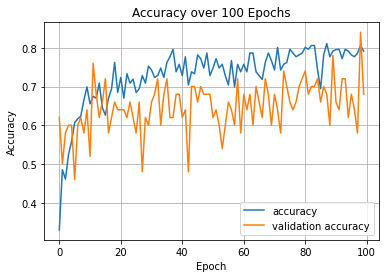

Text(0.5, 1.0, 'Loss over 100 Epochs')

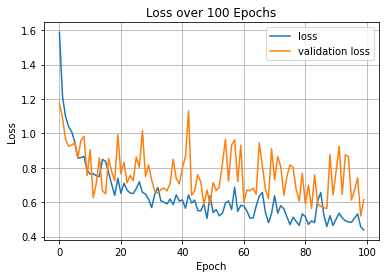

In [6]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy over 100 Epochs")
plt.show()
plt.grid()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Loss over 100 Epochs")

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
Instructions for updating:
Please use Model.evaluate, which supports generators.
36/36 [==============================] - 3s 72ms/step - loss: 0.7196 - accuracy: 0.6389
Test loss: 0.7196133732795715
Test accuracy: 0.6388888955116272


Found 270 images belonging to 4 classes.
270/270 [==============================] - 19s 71ms/step
done


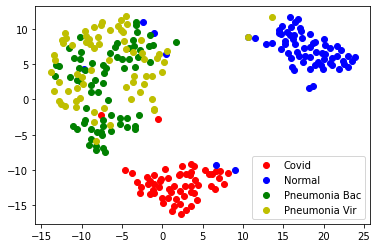

In [15]:
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model
import seaborn as sns
import itertools

intermediate_layer_model2 = Model(inputs=model2.input,
                                        outputs=model2.get_layer('dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")


tsne_eval_generator.shuffle = False
tsne_eval_generator.num_classes = 4

intermediate_layer_model2.compile(optimizer=opt,
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

prediction = intermediate_layer_model2.predict(tsne_eval_generator, verbose = 1)


tsne = TSNE(n_components = 2).fit_transform(prediction)
colors = ["r","b","g","y"]
plt.scatter(tsne[:60,0], tsne[:60,1], c='r', label = "Covid" )
plt.scatter(tsne[60:130,0], tsne[60:130,1], c='b', label = "Normal" )
plt.scatter(tsne[130:200,0], tsne[130:200,1], c='g', label = "Pneumonia Bac" )
plt.scatter(tsne[200:270,0], tsne[200:270,1], c='y', label = "Pneumonia Vir" )
plt.legend()

print("done")

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->